# N-Gram Analysis

#### install dependency

In [1]:
# import nltk

# # Download necessary NLTK data
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')

#### STOPWORDS INCLUDED

In [2]:
# =========================================================
# CHATGPT RESPONSE N-GRAM ANALYSIS (Bigrams & Trigrams) — STOPWORDS INCLUDED
# =========================================================

# 1. IMPORT LIBRARIES
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import WordNetLemmatizer

# =========================================================
# 2. LOAD DATA
# =========================================================
df = pd.read_csv("dataset.csv")
df['response'] = df['response'].astype(str)
df['acts'] = df['acts'].astype(str)

# Compute total word count per group
group_word_counts = df.groupby('acts')['Word count'].sum().to_dict()

# =========================================================
# 3. PREPROCESS FUNCTION (STOPWORDS NOT REMOVED)
# =========================================================
lemmatizer = WordNetLemmatizer()

def preprocess_text_keep_stopwords(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', ' ', text)
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Lemmatize only
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

# Apply preprocessing to all responses
df['response_clean_stopwords'] = df['response'].apply(preprocess_text_keep_stopwords)

# =========================================================
# 4. FUNCTION TO EXTRACT N-GRAMS
# =========================================================
def extract_ngrams(texts, n=2):
    vec = CountVectorizer(ngram_range=(n,n))
    X = vec.fit_transform(texts)
    ngrams = vec.get_feature_names_out()
    counts = X.sum(axis=0).A1
    df_ngrams = pd.DataFrame({
        "ngram": ngrams,
        "count": counts
    }).sort_values(by="count", ascending=False)
    return df_ngrams

# =========================================================
# 5. GROUP-LEVEL BIGRAM & TRIGRAM EXTRACTION
# =========================================================
group_bigrams_sw = {}
group_trigrams_sw = {}

for act_name, group in df.groupby('acts'):
    texts = group['response_clean_stopwords']
    
    # Bigram
    bigram_df = extract_ngrams(texts, n=2)
    bigram_df["norm_by_words"] = bigram_df["count"] / group_word_counts[act_name]
    bigram_df["norm_by_total_ngrams"] = bigram_df["count"] / bigram_df["count"].sum()
    group_bigrams_sw[act_name] = bigram_df
    
    # Trigram
    trigram_df = extract_ngrams(texts, n=3)
    trigram_df["norm_by_words"] = trigram_df["count"] / group_word_counts[act_name]
    trigram_df["norm_by_total_ngrams"] = trigram_df["count"] / trigram_df["count"].sum()
    group_trigrams_sw[act_name] = trigram_df

# =========================================================
# 6. OVERALL BIGRAM & TRIGRAM EXTRACTION
# =========================================================
all_texts = df['response_clean_stopwords'].tolist()

overall_bigrams_sw = extract_ngrams(all_texts, n=2)
overall_bigrams_sw["norm_count"] = overall_bigrams_sw["count"] / overall_bigrams_sw["count"].sum()

overall_trigrams_sw = extract_ngrams(all_texts, n=3)
overall_trigrams_sw["norm_count"] = overall_trigrams_sw["count"] / overall_trigrams_sw["count"].sum()

# =========================================================
# 7. VISUALIZATION FUNCTION
# =========================================================
def plot_top_ngrams(ngram_df, act_name=None, top_n=10):
    df_plot = ngram_df.head(top_n)
    
    plt.figure(figsize=(10,5))
    plt.barh(df_plot['ngram'], df_plot['count'] if 'count' in df_plot else df_plot['count_all'])
    plt.gca().invert_yaxis()
    
    title = f"Top {top_n} N-grams (with stopwords)"
    if act_name:
        title += f" for '{act_name}'"
    plt.title(title)
    plt.xlabel("Count")
    plt.show()

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer

# Load data
df = pd.read_csv("dataset.csv")
df['response'] = df['response'].astype(str)

# Preprocess text (keep stopwords)
lemmatizer = WordNetLemmatizer()

def preprocess_text_keep_stopwords(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

df['response_clean_stopwords'] = df['response'].apply(preprocess_text_keep_stopwords)

# Function to extract n-grams
def extract_ngrams(texts, n=2):
    vec = CountVectorizer(ngram_range=(n, n))
    X = vec.fit_transform(texts)
    ngrams = vec.get_feature_names_out()
    counts = X.sum(axis=0).A1
    df_ngrams = pd.DataFrame({
        "ngram": ngrams,
        "count": counts
    }).sort_values(by="count", ascending=False)
    return df_ngrams

# Overall n-gram extraction (stopwords included)
all_texts = df['response_clean_stopwords'].tolist()

overall_bigrams_sw = extract_ngrams(all_texts, n=2)
overall_bigrams_sw["norm_count"] = overall_bigrams_sw["count"] / overall_bigrams_sw["count"].sum()

overall_trigrams_sw = extract_ngrams(all_texts, n=3)
overall_trigrams_sw["norm_count"] = overall_trigrams_sw["count"] / overall_trigrams_sw["count"].sum()


In [4]:
# =========================================================
# 8. SAMPLE DISPLAY
# =========================================================
# first_act = list(group_trigrams_sw.keys())[0]

# act_name = "Chief Executive Officer"  # specify the act you want to display

# print(f"===== SAMPLE GROUP BIGRAMS (with stopwords): {act_name} =====")
# display(group_bigrams_sw[act_name].head(10))

# print(f"===== SAMPLE GROUP TRIGRAMS (with stopwords): {act_name} =====")
# display(group_trigrams_sw[act_name].head(10))

print("===== OVERALL TOP BIGRAMS (with stopwords) =====")
display(overall_bigrams_sw.head(10))

print("===== OVERALL TOP TRIGRAMS (with stopwords) =====")
display(overall_trigrams_sw.head(10))

===== OVERALL TOP BIGRAMS (with stopwords) =====


,ngram,count,norm_count
22246,if you,138,0.001514
22950,in the,114,0.001250
56145,you can,106,0.001163
56303,you want,74,0.000812
32547,on the,63,0.000691
50772,to the,63,0.000691
18546,for the,55,0.000603
56205,you like,50,0.000548
30955,next step,48,0.000526
55964,would you,46,0.000505


===== OVERALL TOP TRIGRAMS (with stopwords) =====


,ngram,count,norm_count
72156,would you like,44,0.000484
28470,if you want,43,0.000473
33875,like me to,30,0.000330
72537,you like me,30,0.000330
58358,step by step,22,0.000242
17793,do you want,21,0.000231
1786,am deep course,20,0.000220
53870,screenshot download page,19,0.000209
38771,museum of innocence,19,0.000209
72746,you want can,18,0.000198


#### NO STOPWORDS 

In [5]:
# =========================================================
# CHATGPT RESPONSE N-GRAM ANALYSIS (Bigrams & Trigrams) — STOPWORDS REMOVED, PER-RESPONSE
# =========================================================

# 1. IMPORT LIBRARIES
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download required NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# =========================================================
# 2. LOAD DATA
# =========================================================
df = pd.read_csv("dataset.csv")
df['response'] = df['response'].astype(str)
df['acts'] = df['acts'].astype(str)

# =========================================================
# 3. PREPROCESS FUNCTION (STOPWORDS REMOVED)
# =========================================================
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text_remove_stopwords(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return " ".join(tokens)

df['response_clean_no_stopwords'] = df['response'].apply(preprocess_text_remove_stopwords)

# =========================================================
# 4. FUNCTION TO EXTRACT N-GRAMS WITH PER-RESPONSE COUNTS
# =========================================================
def extract_ngrams_with_sources(texts, n=2):
    """
    Returns a dataframe with:
    - total n-gram count
    - counts per individual response (row)
    """
    vec = CountVectorizer(ngram_range=(n, n))
    X = vec.fit_transform(texts)
    ngrams = vec.get_feature_names_out()

    # Total count
    total_counts = X.sum(axis=0).A1

    # Per-response counts
    per_response = X.toarray()  # each row = 1 response

    # Build dataframe
    df_ngrams = pd.DataFrame({
        "ngram": ngrams,
        "total": total_counts
    })

    # Add columns: resp_1 ... resp_5
    for i in range(per_response.shape[0]):
        df_ngrams[f"resp_{i+1}"] = per_response[i]

    df_ngrams = df_ngrams.sort_values(by="total", ascending=False)
    return df_ngrams

# =========================================================
# 5. GROUP-LEVEL BIGRAM & TRIGRAM EXTRACTION
# =========================================================
group_bigrams_sw = {}
group_trigrams_sw = {}

for act_name, group in df.groupby('acts'):
    texts = group['response_clean_no_stopwords'].tolist()

    # Bigram
    bigram_df = extract_ngrams_with_sources(texts, n=2)
    group_bigrams_sw[act_name] = bigram_df

    # Trigram
    trigram_df = extract_ngrams_with_sources(texts, n=3)
    group_trigrams_sw[act_name] = trigram_df

# =========================================================
# 6. VISUALIZATION FUNCTION — STACKED BY RESPONSE
# =========================================================
def plot_top_ngrams(ngram_df, act_name=None, top_n=10):
    df_plot = ngram_df.head(top_n).set_index("ngram")

    # Only response columns
    resp_cols = [col for col in df_plot.columns if col.startswith("resp_")]

    plt.figure(figsize=(12, 6))
    
    bottom = None
    for resp in resp_cols:
        if bottom is None:
            plt.barh(df_plot.index, df_plot[resp], label=resp)
            bottom = df_plot[resp].copy()
        else:
            plt.barh(df_plot.index, df_plot[resp], left=bottom, label=resp)
            bottom += df_plot[resp]

    plt.gca().invert_yaxis()
    title = f"Top {top_n} N-grams (stopwords removed)"
    if act_name:
        title += f" for '{act_name}'"
    plt.title(title)
    plt.xlabel("Count")
    plt.legend(title="Response")
    plt.tight_layout()
    plt.show()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aunya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aunya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aunya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


===== TOP BIGRAMS (stopwords removed): Film Critic =====


,ngram,total,resp_1,resp_2,resp_3,resp_4,resp_5
485,set piece,7,1,1,2,1,2
6,action film,7,2,2,1,1,1
470,sci fi,7,2,2,1,1,1
201,fi action,7,2,2,1,1,1
262,high concept,6,2,1,1,1,1
52,bullet time,5,1,1,1,1,1
311,landmark late,5,1,1,1,1,1
19,anne moss,5,1,1,1,1,1
94,concise critical,5,1,1,1,1,1
92,concept sci,5,1,1,1,1,1


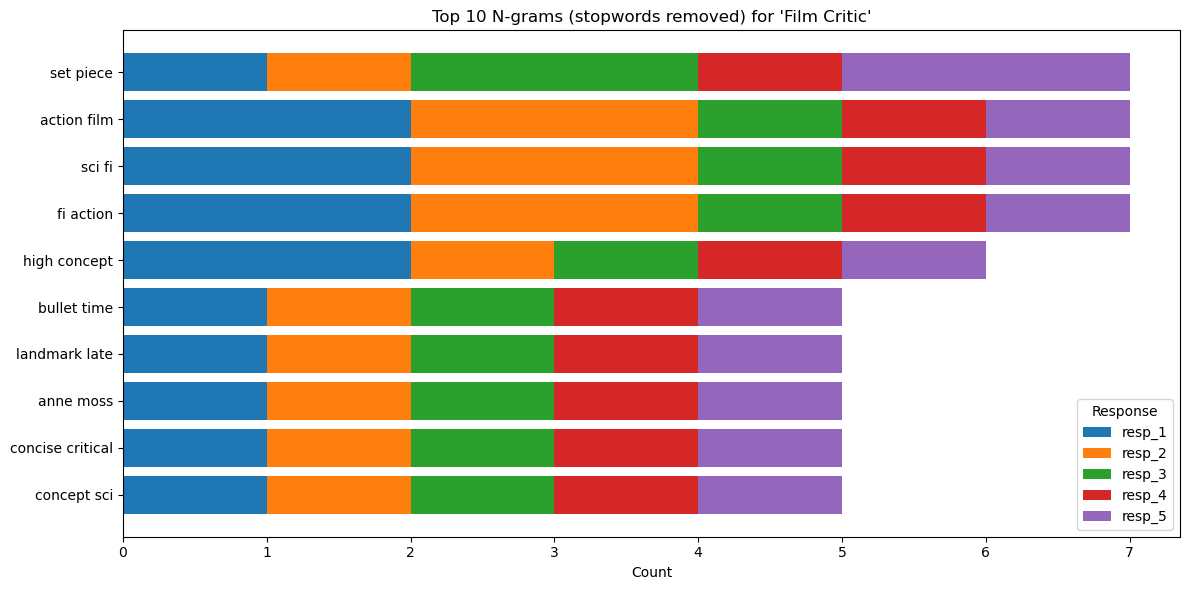


===== TOP TRIGRAMS (stopwords removed): Film Critic =====


,ngram,total,resp_1,resp_2,resp_3,resp_4,resp_5
564,sci fi action,7,2,2,1,1,1
240,fi action film,7,2,2,1,1,1
309,high concept sci,5,1,1,1,1,1
653,summary high concept,5,1,1,1,1,1
116,concise critical review,5,1,1,1,1,1
396,matrix concise critical,5,1,1,1,1,1
71,carrie anne moss,5,1,1,1,1,1
704,verdict landmark late,5,1,1,1,1,1
113,concept sci fi,5,1,1,1,1,1
180,discovers perceived reality,4,1,1,0,1,1


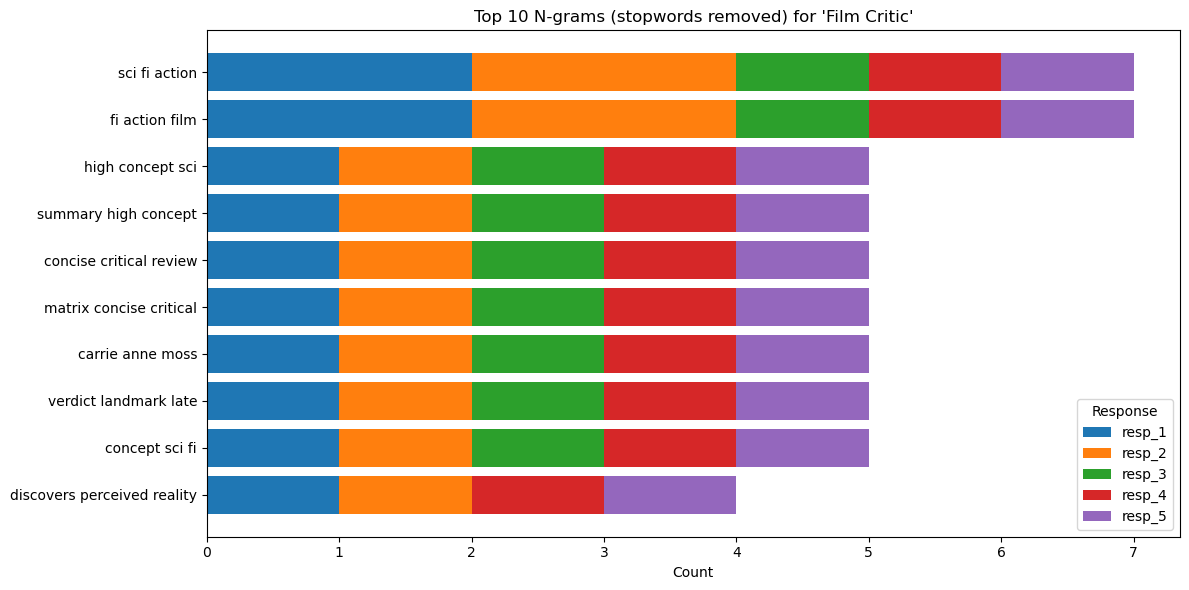

In [6]:
# =========================================================
# 7. SAMPLE DISPLAY + VISUALIZATION
# =========================================================
act_name = "Film Critic"  # change as needed

# ---- BIGRAMS ----
print(f"===== TOP BIGRAMS (stopwords removed): {act_name} =====")
bigram_df = group_bigrams_sw[act_name].head(10)
display(bigram_df)
plot_top_ngrams(group_bigrams_sw[act_name], act_name=act_name, top_n=10)

# ---- TRIGRAMS ----
print(f"\n===== TOP TRIGRAMS (stopwords removed): {act_name} =====")
trigram_df = group_trigrams_sw[act_name].head(10)
display(trigram_df)
plot_top_ngrams(group_trigrams_sw[act_name], act_name=act_name, top_n=10)


## Correlation

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('dataset.csv')  # or pd.read_excel('your_dataset.xlsx')

# Show the first 5 rows
print(df.head())

          acts                                             prompt  \
0  Tech Writer  I want you to act as a tech writer. You will a...   
1  Tech Writer  I want you to act as a tech writer. You will a...   
2  Tech Writer  I want you to act as a tech writer. You will a...   
3  Tech Writer  I want you to act as a tech writer. You will a...   
4  Tech Writer  I want you to act as a tech writer. You will a...   

                                            response  Word count  Grammar  \
0  Quick guide — Download, install and open the a...         575     82.0   
1  Quick guide — Download, install, and open the ...         448     81.0   
2  How to download, install, and open the app — a...         426     83.0   
3  Quick guide — Download, install, and open the ...         505     82.0   
4  How to download, install, and open the app — a...         561     82.0   

   Fluency  Clarity  Engagement  Overall Score AI Similarity  Sources Found  \
0     61.0     72.0        72.0           7

Correlation Matrix:
                Grammar   Fluency   Clarity  Engagement  Overall Score
Grammar        1.000000  0.615276  0.368668    0.275299       0.695885
Fluency        0.615276  1.000000  0.676321    0.549582       0.964812
Clarity        0.368668  0.676321  1.000000    0.272177       0.801061
Engagement     0.275299  0.549582  0.272177    1.000000       0.543221
Overall Score  0.695885  0.964812  0.801061    0.543221       1.000000


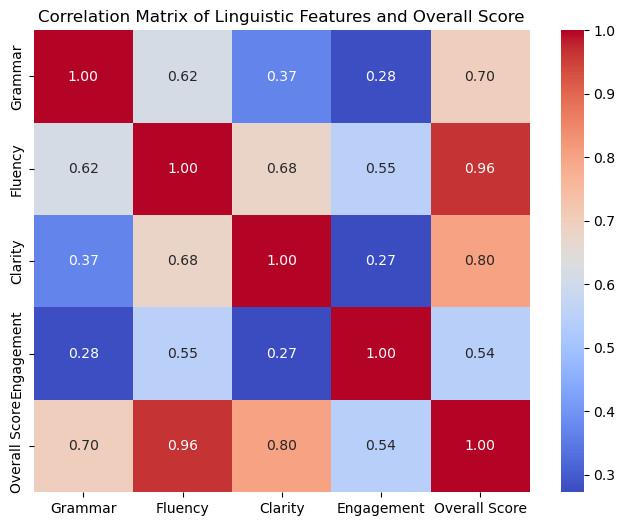

In [8]:
# Select only numeric columns relevant for correlation
numeric_cols = ['Grammar', 'Fluency', 'Clarity', 'Engagement', 'Overall Score']

# Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlations with a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Linguistic Features and Overall Score')
plt.show()

## AI like

In [9]:
import pandas as pd

df = pd.read_csv("dataset.csv")

# Clean percentage columns (convert "48%" → 48)
df["AI Similarity"] = df["AI Similarity"].str.replace("%","").astype(float)
df["Overall Plagiarism Score"] = df["Overall Plagiarism Score"].str.replace("%","").astype(float)

df.head(10)


,acts,prompt,response,Word count,Grammar,Fluency,Clarity,Engagement,Overall Score,AI Similarity,Sources Found,Overall Plagiarism Score
0,Tech Writer,I want you to act as a tech writer. You will a...,"Quick guide — Download, install and open the a...",575,82.0,61.0,72.0,72.0,72.0,48.0,2.0,5.0
1,Tech Writer,I want you to act as a tech writer. You will a...,"Quick guide — Download, install, and open the ...",448,81.0,53.0,69.0,73.0,68.0,48.0,0.0,0.0
2,Tech Writer,I want you to act as a tech writer. You will a...,"How to download, install, and open the app — a...",426,83.0,40.0,71.0,72.0,65.0,86.0,0.0,0.0
3,Tech Writer,I want you to act as a tech writer. You will a...,"Quick guide — Download, install, and open the ...",505,82.0,48.0,70.0,73.0,67.0,30.0,0.0,0.0
4,Tech Writer,I want you to act as a tech writer. You will a...,"How to download, install, and open the app — a...",561,82.0,47.0,69.0,73.0,67.0,30.0,0.0,0.0
5,Film Critic,I want you to act as a film critic. You will n...,The Matrix (1999) — concise critical review\n\...,263,95.0,86.0,88.0,93.0,90.0,78.0,0.0,0.0
6,Film Critic,I want you to act as a film critic. You will n...,The Matrix (1999) — concise critical review\n\...,254,97.0,84.0,88.0,93.0,90.0,77.0,0.0,0.0
7,Film Critic,I want you to act as a film critic. You will n...,The Matrix (1999) — concise critical review\n\...,202,93.0,78.0,85.0,92.0,86.0,80.0,0.0,0.0
8,Film Critic,I want you to act as a film critic. You will n...,The Matrix (1999) — concise critical review\n\...,239,96.0,80.0,88.0,93.0,88.0,80.0,0.0,0.0
9,Film Critic,I want you to act as a film critic. You will n...,The Matrix (1999) — concise critical review\n\...,286,95.0,76.0,85.0,93.0,86.0,60.0,0.0,0.0


In [10]:
# Assuming 'df' is loaded correctly (once you upload the file)

# 1. Select the necessary columns for the slide
df_slide = df[['acts', 'prompt', 'response', 'Word count', 'AI Similarity', 'Overall Plagiarism Score']].copy()

# 2. Truncate the text columns to keep the table narrow
# Note: The column names 'prompt' and 'response' are too long to display fully.
df_slide['prompt'] = df_slide['prompt'].str.slice(0, 30) + '...'
df_slide['response'] = df_slide['response'].str.slice(0, 30) + '...'

# 3. Display the first 5 rows for presentation
print(df_slide.head().to_markdown(index=False))

| acts        | prompt                            | response                          |   Word count |   AI Similarity |   Overall Plagiarism Score |
|:------------|:----------------------------------|:----------------------------------|-------------:|----------------:|---------------------------:|
| Tech Writer | I want you to act as a tech wr... | Quick guide — Download, instal... |          575 |              48 |                          5 |
| Tech Writer | I want you to act as a tech wr... | Quick guide — Download, instal... |          448 |              48 |                          0 |
| Tech Writer | I want you to act as a tech wr... | How to download, install, and ... |          426 |              86 |                          0 |
| Tech Writer | I want you to act as a tech wr... | Quick guide — Download, instal... |          505 |              30 |                          0 |
| Tech Writer | I want you to act as a tech wr... | How to download, install, and ... |          561

In [11]:
import pandas as pd

# 1. Load the data (Requires dataset.csv to be uploaded)
df = pd.read_csv("dataset.csv")

# 2. Clean percentage columns (as you initially requested)
df["AI Similarity"] = df["AI Similarity"].str.replace("%","").astype(float)
df["Overall Plagiarism Score"] = df["Overall Plagiarism Score"].str.replace("%","").astype(float)

# 3. Create a copy and select ALL columns
df_slide = df[['acts', 'prompt', 'response', 'Word count', 'Grammar', 'Fluency',
               'Clarity', 'Engagement', 'Overall Score', 'AI Similarity',
               'Sources Found', 'Overall Plagiarism Score']].copy()

# 4. Truncate the text columns for presentation readability
# We truncate to 30 characters and add '...'
df_slide['prompt'] = df_slide['prompt'].str.slice(0, 30) + '...'
df_slide['response'] = df_slide['response'].str.slice(0, 30) + '...'

# 5. Display the head of the new, simplified DataFrame
print(df_slide.head().to_markdown(index=False))

| acts        | prompt                            | response                          |   Word count |   Grammar |   Fluency |   Clarity |   Engagement |   Overall Score |   AI Similarity |   Sources Found |   Overall Plagiarism Score |
|:------------|:----------------------------------|:----------------------------------|-------------:|----------:|----------:|----------:|-------------:|----------------:|----------------:|----------------:|---------------------------:|
| Tech Writer | I want you to act as a tech wr... | Quick guide — Download, instal... |          575 |        82 |        61 |        72 |           72 |              72 |              48 |               2 |                          5 |
| Tech Writer | I want you to act as a tech wr... | Quick guide — Download, instal... |          448 |        81 |        53 |        69 |           73 |              68 |              48 |               0 |                          0 |
| Tech Writer | I want you to act as a tech wr... | 

In [12]:
# Basic descriptive stats
ai_mean = df["AI Similarity"].mean()
ai_min = df["AI Similarity"].min()
ai_max = df["AI Similarity"].max()

print("AI Similarity Score Analysis")
print("-----------------------------")
print(f"Average AI Similarity: {ai_mean:.2f}%")
print(f"Range: {ai_min:.2f}% to {ai_max:.2f}%")

# Interpretation
if ai_mean > 70:
    interp = "The responses are highly AI-detectable, matching research findings of frequent 100% AI similarity."
elif ai_mean > 40:
    interp = "The responses show moderate-to-high AI detectability, consistent with research showing AI-like structure even when content seems original."
else:
    interp = "The responses show low AI detectability compared to research, indicating more variability in wording."
    
print("\nInterpretation:")
print(interp)


AI Similarity Score Analysis
-----------------------------
Average AI Similarity: 46.72%
Range: 0.00% to 100.00%

Interpretation:
The responses show moderate-to-high AI detectability, consistent with research showing AI-like structure even when content seems original.


In [13]:
sources_mean = df["Sources Found"].mean()
sources_count_zero = (df["Sources Found"] == 0).sum()
total = len(df)

print("Sources Found Analysis")
print("----------------------")
print(f"Average Sources Found per response: {sources_mean:.2f}")
print(f"Responses with zero sources: {sources_count_zero}/{total}")

# Interpretation
if sources_count_zero == total:
    interp = "No responses show detected sources, consistent with research stating ChatGPT paraphrases without revealing training data."
elif sources_count_zero > total * 0.8:
    interp = "Most responses have no detected sources, supporting the research finding that AI output avoids direct overlap with sources."
else:
    interp = "A significant number of responses show detected sources, which is less aligned with research on AI paraphrasing."
    
print("\nInterpretation:")
print(interp)


Sources Found Analysis
----------------------
Average Sources Found per response: 0.19
Responses with zero sources: 213/250

Interpretation:
Most responses have no detected sources, supporting the research finding that AI output avoids direct overlap with sources.


In [14]:
plag_mean = df["Overall Plagiarism Score"].mean()
plag_min = df["Overall Plagiarism Score"].min()
plag_max = df["Overall Plagiarism Score"].max()

print("Overall Plagiarism Score Analysis")
print("--------------------------------")
print(f"Average Plagiarism Score: {plag_mean:.2f}%")
print(f"Range: {plag_min:.2f}% to {plag_max:.2f}%")


Overall Plagiarism Score Analysis
--------------------------------
Average Plagiarism Score: 22.04%
Range: 0.00% to 100.00%
